<a href="https://colab.research.google.com/github/Sanya27/Emotional-PDF-Reader/blob/main/Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TTS MODELS**

# Install TensorFlow TTS

In [ ]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10380, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 10380 (delta 43), reused 42 (delta 17), pack-reused 10290
Receiving objects: 100% (10380/10380), 131.44 MiB | 35.47 MiB/s, done.
Resolving deltas: 100% (4983/4983), done.
Processing /content/TensorFlowTTS
     |████████████████████████████████| 320.4MB 57kB/s 
     |████████████████████████████████| 686kB 42.0MB/s 
     |████████████████████████████████| 245kB 57.9MB/s 
     |████████████████████████████████| 225kB 55.4MB/s 
     |████████████████████████████████| 3.6MB 41.5MB/s 
     |████████████████████████████████| 1.3MB 45.7MB/s 
     |████████████████████████████████| 1.7MB 36.6MB/s 
     |████████████████████████████████| 3.1MB 49.9MB/s 
  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-hiffrmx4/german-transliterate
  Running command git clone -q https://github.com/r

# Download pretrained feature generation model **Tacotron 2**

In [ ]:
print("Downloading Tacotron2 model...")
!gdown --id {"12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW"} -O tacotron2-120k.h5
!gdown --id {"1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY"} -O tacotron2_config.yml

Downloading...
From: https://drive.google.com/uc?id=12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW
To: /content/tacotron2-120k.h5
128MB [00:01, 78.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY
To: /content/tacotron2_config.yml
100% 1.49k/1.49k [00:00<00:00, 1.46MB/s]


# Download pretrained feature generation model **FastSpeech2**

In [ ]:
print("Downloading FastSpeech2 model...")
!gdown --id {"1EhMD20uAFlKsii1lMnlkrsenVTFKM0ld"} -O fastspeech2-150k.h5
!gdown --id {"1wnbIgjTI2iUsCyVJ37ar9CS8-aEjVEee"} -O fastspeech2_config.yml

Downloading...
From: https://drive.google.com/uc?id=1EhMD20uAFlKsii1lMnlkrsenVTFKM0ld
To: /content/fastspeech2-150k.h5
125MB [00:01, 77.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wnbIgjTI2iUsCyVJ37ar9CS8-aEjVEee
To: /content/fastspeech2_config.yml
100% 1.67k/1.67k [00:00<00:00, 1.46MB/s]


# Download pretrained Vocoder model **Multiband MelGAN**

In [ ]:
print("Downloading Multi-band MelGAN model...")
!gdown --id {"1kChFaLI7slrTtuk3pvcOiJwJDCygsw9C"} -O mb.melgan-940k.h5
!gdown --id {"1YC_kZpuRZGQ-JfMKj1LC0YRyKXsgLTJL"} -O mb.melgan_config.yml

Downloading...
From: https://drive.google.com/uc?id=1kChFaLI7slrTtuk3pvcOiJwJDCygsw9C
To: /content/mb.melgan-940k.h5
10.2MB [00:00, 90.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YC_kZpuRZGQ-JfMKj1LC0YRyKXsgLTJL
To: /content/mb.melgan_config.yml
100% 2.18k/2.18k [00:00<00:00, 3.76MB/s]


# Load Model

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


**Tacotron 2**

In [ ]:
tacotron2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/tacotron2/conf/tacotron2.v1.yaml')
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="tacotron2-120k.h5",
    name="tacotron2"
)

**FastSpeech 2**

In [ ]:
fastspeech2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/fastspeech2/conf/fastspeech2.v1.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="fastspeech2-150k.h5",
    name="fastspeech2"
)

**Multiband MelGAN**

In [ ]:
mb_melgan_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/multiband_melgan/conf/multiband_melgan.v1.yaml')
mb_melgan = TFAutoModel.from_pretrained(
    config=mb_melgan_config,
    pretrained_path="mb.melgan-940k.h5",
    name="mb_melgan"
)

# Inference
The first time model run inference will very slow cause by @tf.function.

In [ ]:
print("Downloading ljspeech_mapper.json ...")
!gdown --id {"1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e"} -O ljspeech_mapper.json

Downloading...
From: https://drive.google.com/uc?id=1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e
To: /content/ljspeech_mapper.json
100% 3.57k/3.57k [00:00<00:00, 5.62MB/s]


In [ ]:
processor = AutoProcessor.from_pretrained(pretrained_path="./ljspeech_mapper.json")

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
input_text = "Bill got in the habit of asking himself “Is that thought true?” And if he wasn’t absolutely certain it was, he just let it go."

# Tacotron 2 + Multiband MelGAN

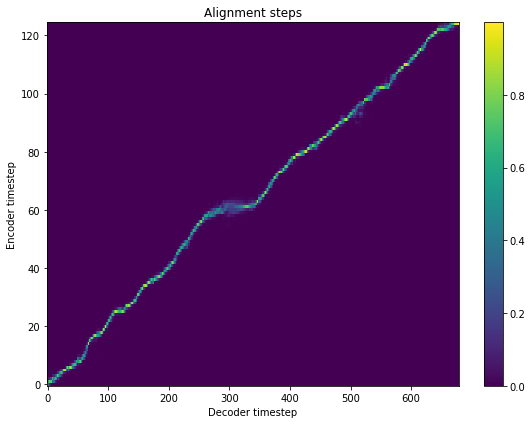

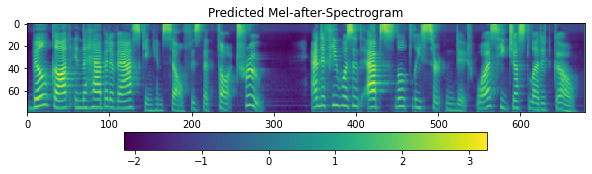

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

# FastSpeech 2 + Multiband MelGAN

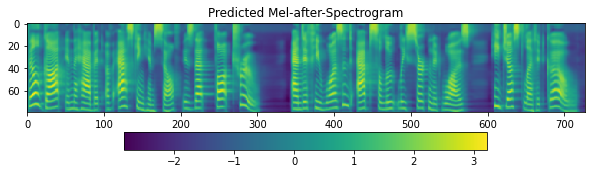

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)